# BERT: Movie Review Sentiment Analysis using k-fold cross-validation

**Dataset**

IMDB dataset has 50K movie reviews for natural language processing.
Please download the dataset from [Kaggle link for IMDB master](https://www.kaggle.com/uttam94/imdb-mastercsv) and preprocess the data. Use the column "type" to seperate training and test datasets if needed as used in this case.

**Problem**

A review in the IMDB dataset is either positive or negative. Therefore, the NLP movie review sentiment analysis task is a supervised learning binary classification problem.

**Settings and Features**

All the runs described in 1-2 have full run and test run. In a test run, only a small number of data is used to test workflow and used as debuging purpose.

1. __k-fold cross-validation (CV)__: Specify fold number, run k-fold CV. The following outputs are created: 
    - k folds models (.h5) are created
    - k folds evaluation files are created
    - k folds probability files are created
    - Performance summary resport including mean accuracy and std are created (not persisted)
    
2. __Evaluate on 25k full test dataset against all folds__. SSNet uses these probability files to get the final results. The following outputs are created:
    - 25k test on k folds evaluation files are created
    - 25k test on k folds probability files are created
    - Performance summary report on 25k test dataset including mean accuracy and std are created (not persisted) 

In [ ]:
# Enable intellisense
%config IPCompleter.greedy=True

In [1]:
# Import modules
import pandas as pd
import numpy as np
import bert
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys

from numpy import mean
from numpy import std

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
pd.set_option('display.max_colwidth',1000)

TensorFlow Version: 2.2.0
Hub version:  0.9.0
GPU is available


In [2]:
# Import preprocessing functions/helper scripts from their respective directories
import sys
sys.path.append("./helpers")
import imdb_preprocess_functions as imdb
sys.path.append("../model_helpers")
import model_utils as model_utils
sys.path.append("../bert_helpers")
import bert_functions as iBert

In [3]:
#dir(iBert)

In [4]:
# Reload helper scripts (e.g., after modifying externally)
import importlib
importlib.reload(model_utils)
importlib.reload(iBert)
importlib.reload(imdb)

<module 'imdb_preprocess_functions' from './helpers/imdb_preprocess_functions.py'>

## Data preprocessing

In [5]:
# Load imdb master data, return 25K train and 25K test datasets
[df_train, df_test] = imdb.get_imdb_df_data()

The number of rows and columns in the training dataset is: (25000, 5)
Missing values in train dataset:
Unnamed: 0    0
type          0
review        0
label         0
file          0
dtype: int64
Check train class balance
1.0    12500
0.0    12500
Name: label, dtype: int64
The number of rows and columns in the test dataset is: (25000, 5)
Missing values in test dataset:
Unnamed: 0    0
type          0
review        0
label         0
file          0
dtype: int64
Check test class balance
1.0    12500
0.0    12500
Name: label, dtype: int64


In [6]:
# # Define test size for test run. Un-comment for test run
# test_size = 300
# # Get test run data for quick run
# [df_train, df_test] = imdb.get_test_run_data(df_train, df_test, test_size)

In [7]:
# k-fold cross validation. k = 5
n_folds = 5

  0%|          | 0/20000 [00:00<?, ?it/s]

label
0.0      2517
1.0      2483
dtype: int64


100%|██████████| 5000/5000 [00:15<00:00, 333.23it/s]


../model_ouput/bert/model_bert_fold_1_tr20000_4.h5
Epoch 1/4
2500/2500 [==============================] - 896s 359ms/step - loss: 0.2511 - accuracy: 0.8974 - val_loss: 0.2263 - val_accuracy: 0.9170
Epoch 2/4
2500/2500 [==============================] - 895s 358ms/step - loss: 0.1242 - accuracy: 0.9563 - val_loss: 0.1914 - val_accuracy: 0.9296
Epoch 3/4
2500/2500 [==============================] - 896s 358ms/step - loss: 0.0625 - accuracy: 0.9799 - val_loss: 0.3620 - val_accuracy: 0.9142
Epoch 4/4
2500/2500 [==============================] - 896s 359ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.2422 - val_accuracy: 0.9326
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


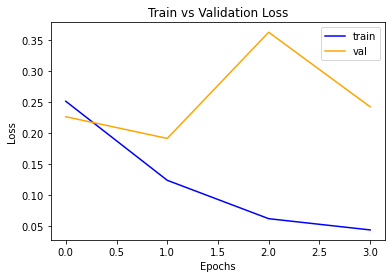

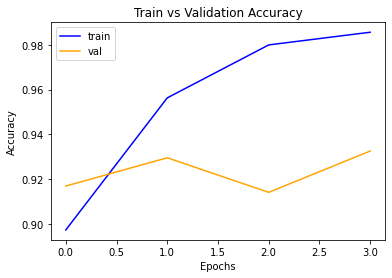

Evaluate model: ../model_ouput/bert/model_bert_fold_1_tr20000_4.h5
625/625 [==============================] - 69s 110ms/step - loss: 0.2422 - accuracy: 0.9326
results are: 
[0.24221362173557281, 0.9326000213623047]
              precision    recall  f1-score   support

           0     0.9475    0.9170    0.9320      2517
           1     0.9185    0.9484    0.9332      2483

    accuracy                         0.9326      5000
   macro avg     0.9330    0.9327    0.9326      5000
weighted avg     0.9331    0.9326    0.9326      5000

> 93.260
label
0.0      2527
1.0      2473
dtype: int64


100%|██████████| 5000/5000 [00:16<00:00, 304.04it/s]


../model_ouput/bert/model_bert_fold_2_tr20000_4.h5
Epoch 1/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.2473 - accuracy: 0.8990 - val_loss: 0.2319 - val_accuracy: 0.9180
Epoch 2/4
2500/2500 [==============================] - 897s 359ms/step - loss: 0.1276 - accuracy: 0.9565 - val_loss: 0.2054 - val_accuracy: 0.9334
Epoch 3/4
2500/2500 [==============================] - 897s 359ms/step - loss: 0.0690 - accuracy: 0.9776 - val_loss: 0.2149 - val_accuracy: 0.9248
Epoch 4/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.0432 - accuracy: 0.9856 - val_loss: 0.2511 - val_accuracy: 0.9288
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


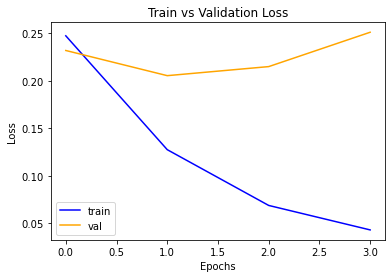

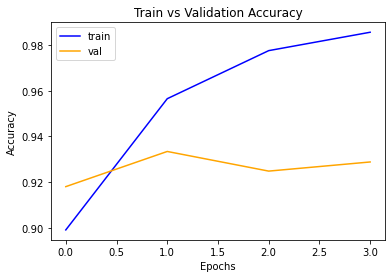

Evaluate model: ../model_ouput/bert/model_bert_fold_2_tr20000_4.h5
625/625 [==============================] - 69s 110ms/step - loss: 0.2511 - accuracy: 0.9288
results are: 
[0.2510599195957184, 0.9287999868392944]
              precision    recall  f1-score   support

           0     0.9540    0.9027    0.9276      2527
           1     0.9057    0.9555    0.9299      2473

    accuracy                         0.9288      5000
   macro avg     0.9299    0.9291    0.9288      5000
weighted avg     0.9301    0.9288    0.9288      5000

> 92.880
label
1.0      2511
0.0      2489
dtype: int64


100%|██████████| 5000/5000 [00:17<00:00, 287.17it/s]


../model_ouput/bert/model_bert_fold_3_tr20000_4.h5
Epoch 1/4
2500/2500 [==============================] - 899s 360ms/step - loss: 0.2501 - accuracy: 0.9002 - val_loss: 0.1902 - val_accuracy: 0.9328
Epoch 2/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.1246 - accuracy: 0.9560 - val_loss: 0.1961 - val_accuracy: 0.9322
Epoch 3/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.0662 - accuracy: 0.9775 - val_loss: 0.2051 - val_accuracy: 0.9364
Epoch 4/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.2406 - val_accuracy: 0.9314
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


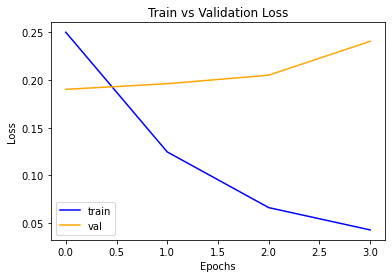

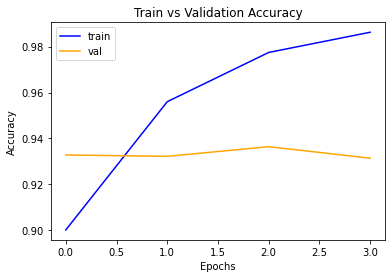

Evaluate model: ../model_ouput/bert/model_bert_fold_3_tr20000_4.h5
625/625 [==============================] - 69s 110ms/step - loss: 0.2406 - accuracy: 0.9314
results are: 
[0.240617573261261, 0.9314000010490417]
              precision    recall  f1-score   support

           0     0.9152    0.9502    0.9324      2489
           1     0.9487    0.9128    0.9304      2511

    accuracy                         0.9314      5000
   macro avg     0.9320    0.9315    0.9314      5000
weighted avg     0.9320    0.9314    0.9314      5000

> 93.140
label
1.0      2563
0.0      2437
dtype: int64


100%|██████████| 5000/5000 [00:17<00:00, 289.86it/s]


../model_ouput/bert/model_bert_fold_4_tr20000_4.h5
Epoch 1/4
2500/2500 [==============================] - 899s 360ms/step - loss: 0.2556 - accuracy: 0.8977 - val_loss: 0.1993 - val_accuracy: 0.9192
Epoch 2/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.1267 - accuracy: 0.9559 - val_loss: 0.2351 - val_accuracy: 0.9138
Epoch 3/4
2500/2500 [==============================] - 899s 360ms/step - loss: 0.0633 - accuracy: 0.9793 - val_loss: 0.2153 - val_accuracy: 0.9216
Epoch 4/4
2500/2500 [==============================] - 899s 360ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.2823 - val_accuracy: 0.9314
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


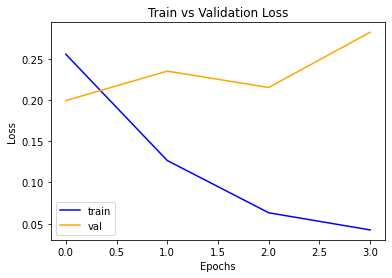

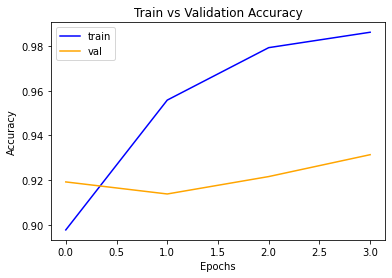

Evaluate model: ../model_ouput/bert/model_bert_fold_4_tr20000_4.h5
625/625 [==============================] - 69s 110ms/step - loss: 0.2823 - accuracy: 0.9314
results are: 
[0.28228867053985596, 0.9314000010490417]
              precision    recall  f1-score   support

           0     0.9312    0.9278    0.9295      2437
           1     0.9316    0.9348    0.9332      2563

    accuracy                         0.9314      5000
   macro avg     0.9314    0.9313    0.9313      5000
weighted avg     0.9314    0.9314    0.9314      5000

> 93.140
label
0.0      2530
1.0      2470
dtype: int64


100%|██████████| 5000/5000 [00:17<00:00, 283.77it/s]


../model_ouput/bert/model_bert_fold_5_tr20000_4.h5
Epoch 1/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.2461 - accuracy: 0.9024 - val_loss: 0.2448 - val_accuracy: 0.9036
Epoch 2/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.1269 - accuracy: 0.9570 - val_loss: 0.2047 - val_accuracy: 0.9344
Epoch 3/4
2500/2500 [==============================] - 898s 359ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.2529 - val_accuracy: 0.9334
Epoch 4/4
2500/2500 [==============================] - 897s 359ms/step - loss: 0.0438 - accuracy: 0.9853 - val_loss: 0.2628 - val_accuracy: 0.9262
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


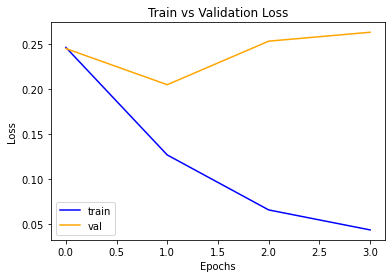

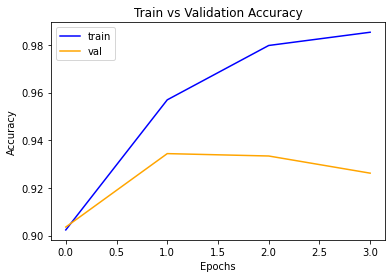

Evaluate model: ../model_ouput/bert/model_bert_fold_5_tr20000_4.h5
625/625 [==============================] - 69s 110ms/step - loss: 0.2628 - accuracy: 0.9262
results are: 
[0.26282596588134766, 0.9261999726295471]
              precision    recall  f1-score   support

           0     0.9300    0.9237    0.9268      2530
           1     0.9224    0.9287    0.9256      2470

    accuracy                         0.9262      5000
   macro avg     0.9262    0.9262    0.9262      5000
weighted avg     0.9262    0.9262    0.9262      5000

> 92.620
Accuracy: mean=93.008 std=0.230, n=5


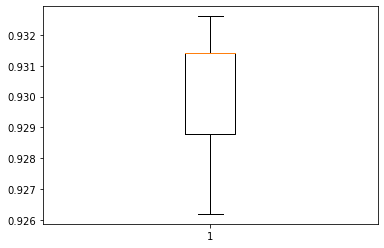

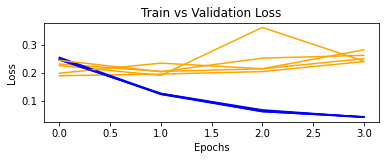

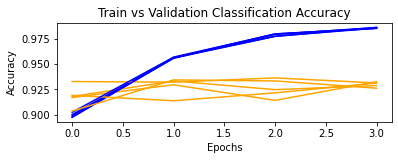

In [8]:
iBert.run_k_fold_cv(df_train, n_folds)

100%|██████████| 25000/25000 [01:25<00:00, 293.45it/s]


20000
../model_ouput/bert/model_bert_fold_1_tr20000_4.h5
3125/3125 [==============================] - 344s 110ms/step - loss: 0.2250 - accuracy: 0.9337
results are: 
[0.2249670922756195, 0.9337199926376343]
              precision    recall  f1-score   support

           0     0.9466    0.9193    0.9327     12500
           1     0.9215    0.9482    0.9347     12500

    accuracy                         0.9337     25000
   macro avg     0.9341    0.9337    0.9337     25000
weighted avg     0.9341    0.9337    0.9337     25000

> 93.372
../model_ouput/bert/model_bert_fold_2_tr20000_4.h5
3125/3125 [==============================] - 344s 110ms/step - loss: 0.2436 - accuracy: 0.9318
results are: 
[0.24357570707798004, 0.9318400025367737]
              precision    recall  f1-score   support

           0     0.9534    0.9081    0.9302     12500
           1     0.9122    0.9556    0.9334     12500

    accuracy                         0.9318     25000
   macro avg     0.9328    0.9318    

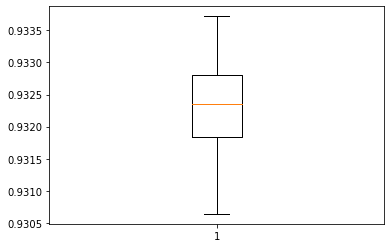

In [9]:
# Evaluate the model using k-fold cross-validation
x_test, y_test, df_fit_test = iBert.get_data_ready(df_test)
train_size = int(len(df_train) - len(df_train)/n_folds)
print(train_size)
model_utils.evaluate_test_dataset_k_fold(x_test, y_test, n_folds,"bert", iBert.EPOCHS, iBert.BATCH_SIZE, df_fit_test, train_size)